In [38]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [ ]:
data_path = os.path.expanduser("./data")

# Listar os arquivos válidos (ignorando arquivos com ":Zone.Identifier")
csv_files = [f for f in os.listdir(data_path) if f.endswith('.csv') and ':Zone.Identifier' not in f]

# Mostrar os arquivos encontrados
print("Arquivos CSV encontrados:", csv_files)


Arquivos CSV encontrados: ['clstr_4_dec.csv', 'clstr_3_nov.csv', 'clstr_0_dec.csv', 'clstr_1_dec.csv', 'clstr_4_nov.csv', 'clstr_0_nov.csv', 'clstr_2_dec.csv', 'clstr_2_nov.csv', 'clstr_1_nov.csv', 'clstr_3_dec.csv']


: 

In [ ]:
# Função para carregar um CSV
def load_csv(filename):
    file_path = os.path.join(data_path, filename)
    df = pd.read_csv(file_path)

    # Corrigir a coluna timestamp
    if 'timestamp' in df.columns:
        df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce', infer_datetime_format=True)

    return df

# Carregar os DataFrames
df_0_nov = load_csv("clstr_0_nov.csv")
df_0_dec = load_csv("clstr_0_dec.csv")
df_4_dec = load_csv("clstr_4_dec.csv")

# Concatenar clstr_0_nov + clstr_0_nov
concat_same = pd.concat([df_0_nov, df_0_dec], ignore_index=True)
concat_same.sort_values('timestamp', inplace=True)
concat_same.set_index('timestamp', inplace=True)

# Concatenar clstr_0_nov + clstr_4_dec
concat_diff = pd.concat([df_0_nov, df_4_dec], ignore_index=True)
concat_diff.sort_values('timestamp', inplace=True)
concat_diff.set_index('timestamp', inplace=True)




/tmp/ipykernel_14809/4227667055.py:8: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce', infer_datetime_format=True)
/tmp/ipykernel_14809/4227667055.py:8: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce', infer_datetime_format=True)
/tmp/ipykernel_14809/4227667055.py:8: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas

: 

In [ ]:
print(df_0_nov['timestamp'].min(), df_0_nov['timestamp'].max())

2013-11-01 00:00:00 2013-11-30 23:50:00


: 

In [ ]:
print(df_0_nov['timestamp'].dtype)
print(df_4_dec['timestamp'].dtype)

datetime64[ns]
datetime64[ns]


: 

In [ ]:
# Cores
gold = '#ffd601'
purple = "#b52d2d"

: 

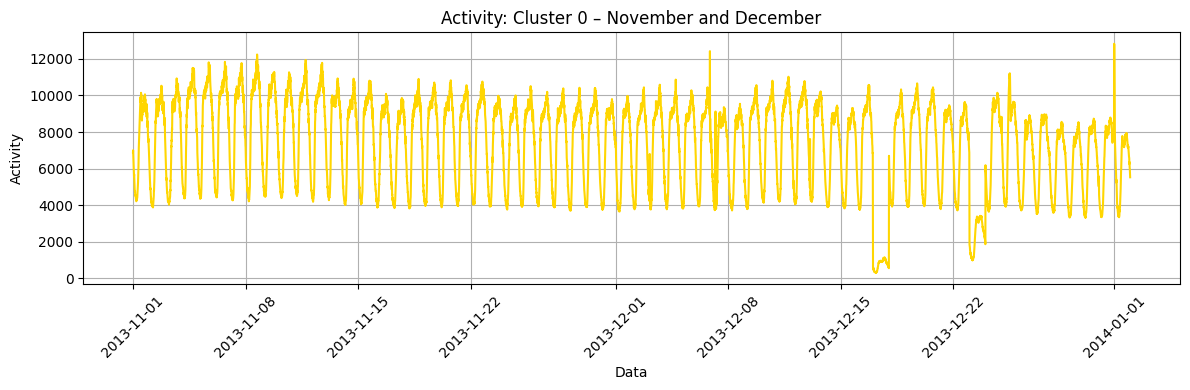

: 

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(concat_same.index, concat_same['activity'], color=gold)
plt.title("Activity: Cluster 0 – November and December")
plt.xlabel("Data")
plt.ylabel("Activity")
plt.grid(True)
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.tight_layout()

# Salvar o gráfico como imagem PNG
plt.savefig("activity_cluster0_nov_dec.png", dpi=300)  # dpi alto = melhor qualidade

plt.show()


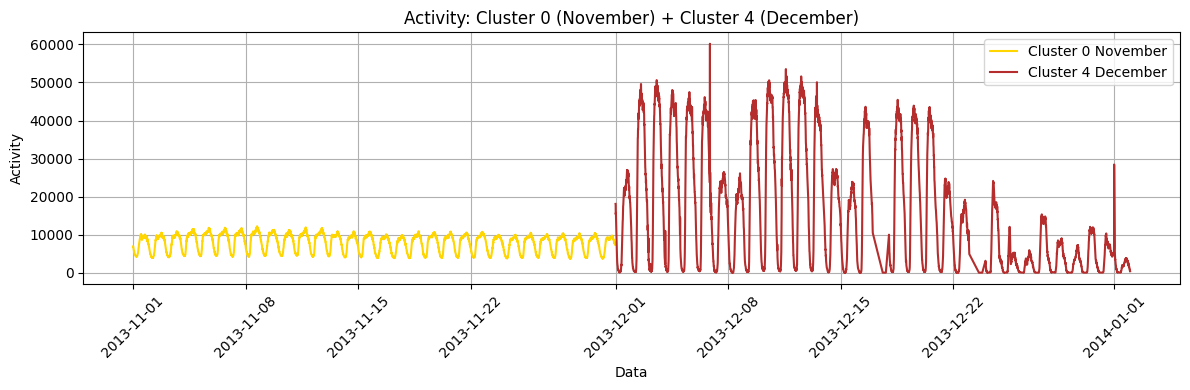

: 

In [ ]:
df_0_nov_sorted = df_0_nov.sort_values('timestamp')
df_4_dec_sorted = df_4_dec.sort_values('timestamp')

plt.figure(figsize=(12, 4))
plt.plot(df_0_nov_sorted['timestamp'], df_0_nov_sorted['activity'], color=gold, label='Cluster 0 November')
plt.plot(df_4_dec_sorted['timestamp'], df_4_dec_sorted['activity'], color=purple, label='Cluster 4 December')
plt.title("Activity: Cluster 0 (November) + Cluster 4 (December)")
plt.xlabel("Data")
plt.ylabel("Activity")
plt.grid(True)
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.tight_layout()

# Salvar o gráfico como imagem PNG
plt.savefig("activity_cluster0_4_nov_dec.png", dpi=300)

plt.show()


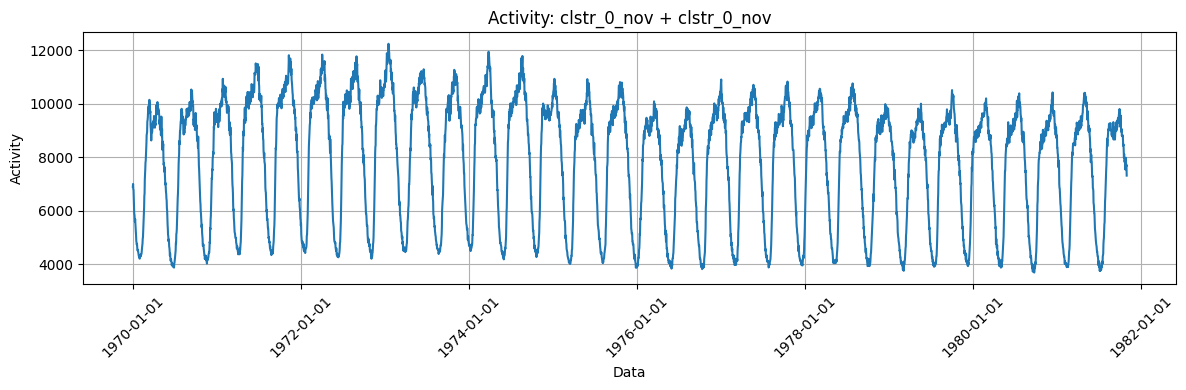

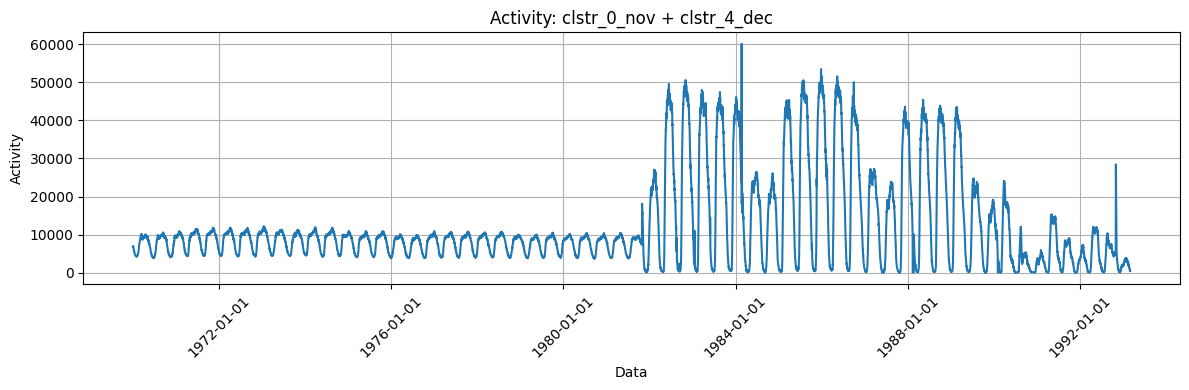

: 

: 

In [ ]:
# Função para plotar com eixo de datas limpo
def plot_activity(df, title):
    plt.figure(figsize=(12, 4))
    plt.plot(df.index, df['activity'])
    plt.title(title)
    plt.xlabel("Data")
    plt.ylabel("Activity")
    plt.grid(True)
    
    # Formatação do eixo X (datas)
    plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())   # Espaçamento automático
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Formato da data
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

# Plot 1
plot_activity(concat_same, "Activity: clstr_0_nov + clstr_0_nov")

# Plot 2
plot_activity(concat_diff, "Activity: clstr_0_nov + clstr_4_dec")